# Model selection 1 - fixed NEON domain

Selection of models representing 

In [1]:
library('ggplot2')
library('repr')
library('dplyr')
library('nlme')

source('common_stats_functions.r')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.2.1, November 1st, 2019, [PJ_VERSION: 620]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 


OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


In [2]:
# Get the sensitivity statistics dataframe and
# the long-term USHCN statistics datafame
df <- sensitivity_stats_df()
dim(df)
#df2 <- longterm_climate_df()
#dim(df2)

[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/MODIS/annual_ushcn_NDVI.csv"


Parsed with column specification:
cols(
  stationid = col_character(),
  year = col_double(),
  ndvi_mean = col_double(),
  ndvi_max = col_double(),
  ndvi_min = col_double(),
  ndvi_sum = col_double(),
  zndvi_mean = col_double(),
  zndvi_max = col_double(),
  zndvi_min = col_double(),
  zndvi_sum = col_double(),
  ndvi_gsmean = col_double(),
  ndvi_gssum = col_double(),
  zndvi_gsmean = col_double(),
  zndvi_gssum = col_double()
)


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/annual_ushcn_spei_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character()
)
See spec(...) for full column specifications.


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/allyr_ushcn_calcs_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


[1] "Assigning NEON domain names to locCalcs dataframe..."
OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields
[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/MODIS/annual_ushcn_eeMODIS.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  date = col_datetime(format = "")
)
See spec(...) for full column specifications.


[1] "Subsetting SPEI (>1999) and merging three dataframes..."
[1] "Removing 160 rows missing domain names..."


[1] 19328    94

Warning message:
“Removed 736 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 736 rows containing missing values (geom_point).”Warning message:
“Removed 736 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 736 rows containing missing values (geom_point).”

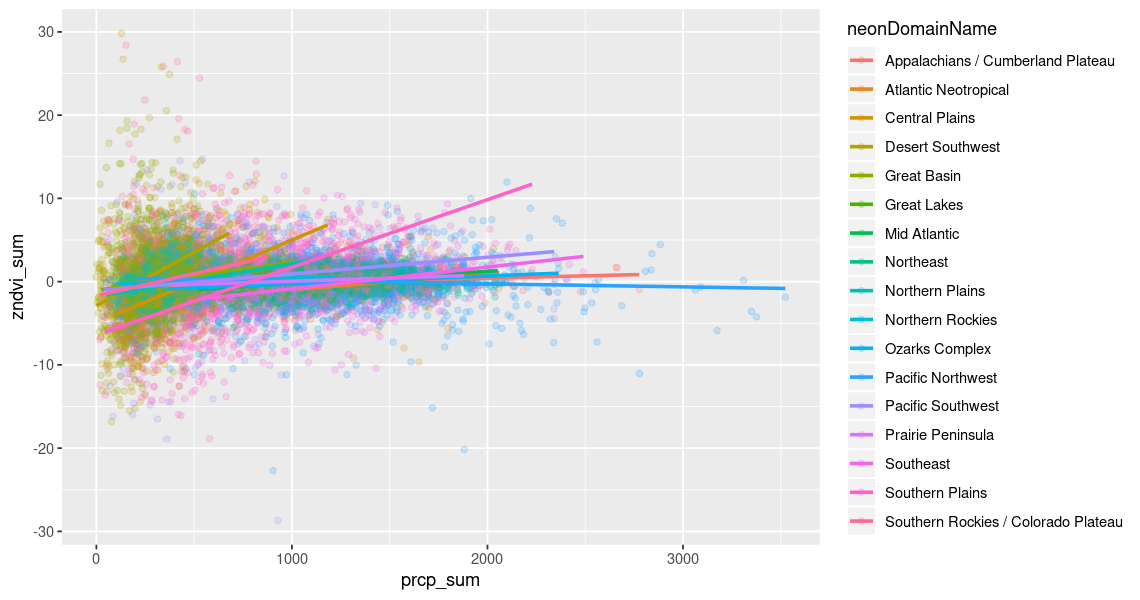

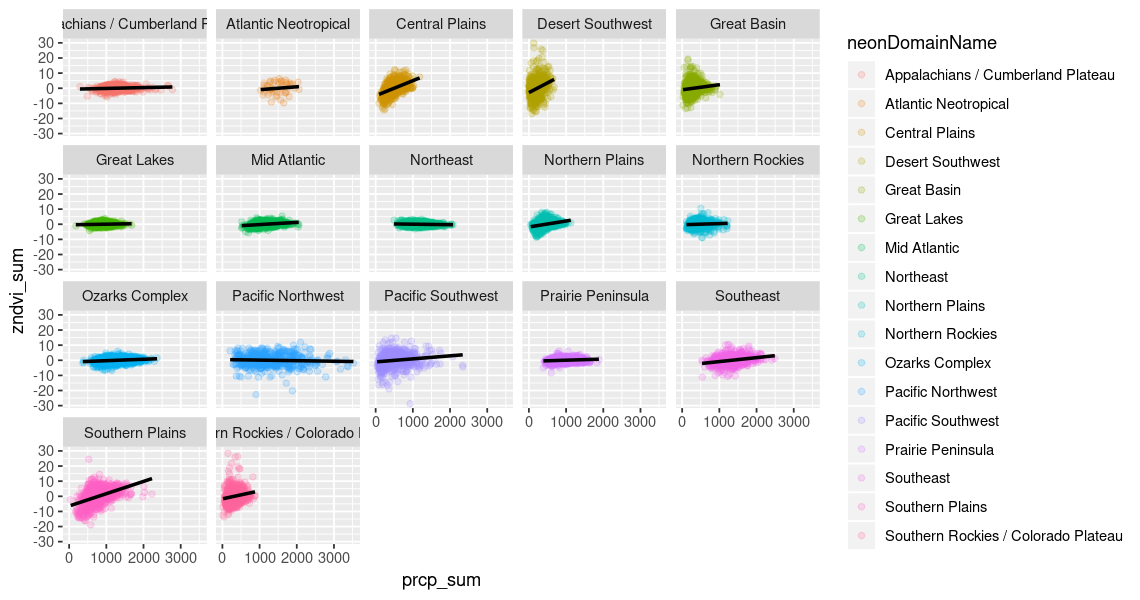

In [3]:
options(repr.plot.width=9.5, repr.plot.height=5)

ggplot(df, aes(x=prcp_sum, y=zndvi_sum, col=neonDomainName)) +
    geom_point(alpha=2/10) + 
    geom_smooth(method='lm', se=FALSE)

ggplot(df, aes(x=prcp_sum, y=zndvi_sum, color=neonDomainName)) +
    geom_point(alpha=2/10) + facet_wrap(~neonDomainName)  +
    geom_smooth(method = "lm", se=FALSE, color="black")

## Fit sensitivity models by domain

In [4]:
ctrl <- lmeControl(opt='nlminb')#nlminb is default, or optim
ndviprcp_lme <- lme(ndvi_sum ~ prcp_sum + neonDomainName, random=~1+prcp_sum|stationid,
                    control=ctrl, correlation=corAR1(),
                    data=df, na.action=na.omit)
summary(ndviprcp_lme)

Linear mixed-effects model fit by REML
 Data: df 
        AIC       BIC   logLik
  -1144.529 -964.4502 595.2645

Random effects:
 Formula: ~1 + prcp_sum | stationid
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev       Corr  
(Intercept) 1.1332114042 (Intr)
prcp_sum    0.0005668602 -0.708
Residual    0.1956072088       

Correlation Structure: AR(1)
 Formula: ~1 | stationid 
 Parameter estimate(s):
      Phi 
0.2532891 
Fixed effects: ndvi_sum ~ prcp_sum + neonDomainName 
                                                      Value Std.Error    DF
(Intercept)                                        6.587160 0.1073958 17429
prcp_sum                                           0.000460 0.0000195 17429
neonDomainNameAtlantic Neotropical                -0.547633 0.4762285  1145
neonDomainNameCentral Plains                      -1.825345 0.1504361  1145
neonDomainNameDesert Southwest                    -3.161600 0.1863025  1145
neonDomainNameGreat Basin   

In [5]:
data.frame(ndviprcp_lme$coefficients$fixed)

,ndviprcp_lme.coefficients.fixed
,<dbl>
(Intercept),6.5871598521
prcp_sum,0.0004597444
neonDomainNameAtlantic Neotropical,-0.5476328495
neonDomainNameCentral Plains,-1.8253449481
neonDomainNameDesert Southwest,-3.1615999839
neonDomainNameGreat Basin,-2.3525041931
neonDomainNameGreat Lakes,-0.8040716988
neonDomainNameMid Atlantic,0.0557308720
neonDomainNameNortheast,-0.0661205670


In [6]:
head(data.frame(ndviprcp_lme$coefficients$random))

,stationid..Intercept.,stationid.prcp_sum
,<dbl>,<dbl>
USH00011084,1.4063941,-2.922072e-04
USH00013160,1.6553396,-3.722285e-04
USH00013511,1.4767417,-2.037179e-04
USH00013816,1.4598795,-2.393875e-04
USH00015749,-0.5961764,9.141924e-06
USH00017157,0.5520919,-2.074204e-04


**The above doesn't look very promising**. Lots of very negative slopes in the fixed effects, which doesn't make alot of sense. The random intercepts seem significant, but random slopes do not (they are small)

Below we try to analyze the ouput of this model more (not finished)

In [7]:
# ndvi~prcp - Get fixed and random domain effects from model
ndviprcp_fe <- data.frame(ndviprcp_lme$coefficients$fixed)
colnames(ndviprcp_fe) <- c('ndvi_prcp_Intcpt', 'ndvi_prcp_Slope')
ndviprcp_fe$neonDomainName <- c('FixedEffects',
                                row.names(ndviprcp_fe)[2:length(row.names(ndviprcp_fe))])
# Get random stationid effects
ndviprcp_re <- data.frame(ndviprcp=ndviprcp_best$coefficients$random$stationid)
colnames(ndviprcp_re) <- c('ndvi_prcp_randomIntcpt', 'ndvi_prcp_randomSlope')
# Get domain and station names from the random effects
ndviprcp_re$stationid <- paste0('U', do.call('rbind',
                    strsplit(as.character(rownames(ndviprcp_re)), '/U',fixed=TRUE))[,2])

ERROR: Error in names(x) <- value: 'names' attribute [2] must be the same length as the vector [1]


## Loop through and estimate by domain

In [8]:
# Loop through each domain, fit a mixed model:
# ndvi_sum ~ prcp_sum, random=~1+prcp_sum|stationid
# And extract the fixed and random coefficients into a dataframe

# Get list of domaints to iterate over
domains <- unique(df$neonDomainName)

dim(df)
tot <- 0

# Set an optimization parameter - not quite sure why
# but it helps models converge
ctrl <- lmeControl(opt='optim')

for(d in domains){
    #print(d)
    df_sub <- subset(df, neonDomainName==d)
    nrec <- dim(df_sub)[1]
    tot <- tot + nrec
    #print(dim(df_sub))
    # Get some mean annual statistics for domains
    gb_dom <- df_sub %>% group_by(neonDomainName) %>% summarise(MAP=mean(prcp_sum, na.rm=TRUE),
                                                            MAT=mean(tavg_mean, na.rm=TRUE),
                                                            spei12mo_trend=mean(spei12mo_trend, na.rm=TRUE),
                                                            spei12mo_cv5yr_trend=mean(spei12mo_cv5yr_trend,na.rm=TRUE))

    # Get some mean annual statistics for stationid (random effect)
    gb_sta <- df_sub %>% group_by(stationid) %>% summarise(MAP=mean(prcp_sum, na.rm=TRUE),
                                                            MAT=mean(tavg_mean, na.rm=TRUE),
                                                            spei12mo_trend=mean(spei12mo_trend, na.rm=TRUE),
                                                            spei12mo_cv5yr_trend=mean(spei12mo_cv5yr_trend,na.rm=TRUE))
    # Add domain name column
    gb_sta$neonDomainName <- d
    
    # FIT MODEL 1
    # ndvi ~ prcp_sum with AR1 correlation structure and station random effect
    ndviprcp <- lme(ndvi_sum ~ prcp_sum, random=~1+prcp_sum|stationid,
                     control=ctrl, correlation=corAR1(),
                     data=df_sub, na.action=na.omit)
    # Get fixed effects (ndvi~prcp for domain) name columns, get p values
    ndviprcp_fe <- as.data.frame(t(ndviprcp$coefficients$fixed))
    colnames(ndviprcp_fe) <- c('ndvi_prcp_Intcpt', 'ndvi_prcp_Slope')
    ndviprcp_fe$ndvi_prcp_pval <- summary(ndviprcp)$tTable['prcp_sum','p-value']
    # Get random effects (ndvi~prcp by stationid)
    ndviprcp_re <- as.data.frame(ndviprcp$coefficients$random$stationid)
    colnames(ndviprcp_re) <- c('ndvi_prcp_randomIntcpt', 'ndvi_prcp_randomSlope')
    # Add fixed effect to random effect
    ndviprcp_re$ndvi_prcp_randomSlope <- (ndviprcp_re$ndvi_prcp_randomSlope + 
                                             ndviprcp_fe$ndvi_prcp_Slope)
    ndviprcp_re$stationid <- rownames(ndviprcp_re)
    
    # FIT MODEL 2
    # zndvi ~ prcp_sum with AR1 correlation structure and station random effect
    zndviprcp <- lme(zndvi_sum ~ prcp_sum, random=~1+prcp_sum|stationid,
                     control=ctrl, correlation=corAR1(),
                     data=df_sub, na.action=na.omit)
    # Get fixed effects (zndvi~prcp for domain) name columns, get p values
    zndviprcp_fe <- as.data.frame(t(zndviprcp$coefficients$fixed))
    colnames(zndviprcp_fe) <- c('zndvi_prcp_Intcpt', 'zndvi_prcp_Slope')
    zndviprcp_fe$zndvi_prcp_pval <- summary(zndviprcp)$tTable['prcp_sum','p-value']
    # Get random effects (zndvi~prcp by stationid)
    zndviprcp_re <- as.data.frame(zndviprcp$coefficients$random$stationid)
    colnames(zndviprcp_re) <- c('zndvi_prcp_randomIntcpt', 'zndvi_prcp_randomSlope')
    # Add fixed effect to random effect
    zndviprcp_re$zndvi_prcp_randomSlope <- (zndviprcp_re$zndvi_prcp_randomSlope + 
                                             zndviprcp_fe$zndvi_prcp_Slope)
    zndviprcp_re$stationid <- rownames(zndviprcp_re)
    
    #FIT MODEL 3
    # zndvi ~ 12monSPEI with AR1 correlation structure and station random effect
    zndvispei <- lme(zndvi_sum ~ spei12mo_mean, random=~1+spei12mo_mean|stationid,
                     control=ctrl, correlation=corAR1(),
                     data=df_sub, na.action=na.omit)
    # Get fixed effects (zndvi~spei for domain) name columns, get p values
    zndvispei_fe <- as.data.frame(t(zndvispei$coefficients$fixed))
    colnames(zndvispei_fe) <- c('zndvi_spei_Intcpt', 'zndvi_spei_Slope')
    zndvispei_fe$zndvi_spei_pval <- summary(zndvispei)$tTable['spei12mo_mean','p-value']
    # Get random effects (zndvi~spei by stationid)
    zndvispei_re <- as.data.frame(zndvispei$coefficients$random$stationid)
    colnames(zndvispei_re) <- c('zndvi_spei_randomIntcpt', 'zndvi_spei_randomSlope')
    # Add fixed effect to random effect
    zndvispei_re$zndvi_spei_randomSlope <- (zndvispei_re$zndvi_spei_randomSlope + 
                                             zndvispei_fe$zndvi_spei_Slope)
    zndvispei_re$stationid <- rownames(zndvispei_re)
    
    # Create fixed_effect and random_effect dataframes
    fe <- data.frame(cbind(gb_dom, ndviprcp_fe, zndviprcp_fe, zndvispei_fe))
    re <- list(gb_sta, ndviprcp_re, zndviprcp_re, zndvispei_re) %>%
        Reduce(function(df1,df2) left_join(df1,df2,by="stationid"), .)
    # Join new dataframes together    
    if (d==domains[1]){
        fe_dom <- fe
        re_sta <- re
    } else {
        fe_dom <- rbind(fe_dom, fe)
        re_sta <- rbind(re_sta, re)
    }
}
print(tot)
head(fe_dom)
head(re_sta)

[1] 19328    94

[1] 19328


neonDomainName,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,ndvi_prcp_Intcpt,ndvi_prcp_Slope,ndvi_prcp_pval,zndvi_prcp_Intcpt,zndvi_prcp_Slope,zndvi_prcp_pval,zndvi_spei_Intcpt,zndvi_spei_Slope,zndvi_spei_pval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Southeast,1341.7119,19.790463,0.0000320107,2.613529e-05,7.151755,0.0002263934,6.650187e-17,-3.9192740,0.0030452848,2.806600e-19,0.3374695899,0.7662702,4.053360e-16
Ozarks Complex,1284.0502,16.280637,0.0003284556,-2.057495e-05,6.965530,0.0001355178,3.992075e-16,-1.2622782,0.0009799434,4.483966e-17,0.0003239129,0.3944422,1.099127e-11
Desert Southwest,225.0551,19.144803,-0.0008694542,1.476098e-04,2.697895,0.0014321893,8.940243e-23,-4.5556797,0.0196077742,3.797522e-14,6.5362441691,6.6190302,4.970289e-26
Southern Rockies / Colorado Plateau,320.2689,10.083763,-0.0003789249,6.942214e-05,3.560189,0.0009748545,3.740558e-19,-3.0091732,0.0100767024,9.467210e-12,2.3042943005,3.1254258,3.235098e-20
Pacific Southwest,537.4453,15.690401,-0.0003926589,1.150420e-04,5.711676,0.0003244860,6.481802e-04,-0.9656551,0.0018840369,4.031348e-03,1.5574557496,2.2893430,4.304492e-12
Great Basin,308.4206,9.069863,-0.0003262137,6.795495e-05,3.963929,0.0008201440,4.735614e-18,-1.1438260,0.0037678848,5.096769e-08,0.9784341649,1.6579157,1.194385e-15


stationid,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,neonDomainName,ndvi_prcp_randomIntcpt,ndvi_prcp_randomSlope,zndvi_prcp_randomIntcpt,zndvi_prcp_randomSlope,zndvi_spei_randomIntcpt,zndvi_spei_randomSlope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,1569.225,19.65286,4.948660e-04,-5.418599e-05,Southeast,1.102533,0.0001627478,0.6642017,0.002484397,-0.07259576,0.5234333
USH00012813,1690.481,19.48766,2.871429e-04,1.828267e-05,Southeast,NA,NA,NA,NA,NA,NA
USH00013816,1354.350,16.84411,3.157518e-04,-3.465651e-06,Southeast,1.184763,0.0001823495,0.4641934,0.002655980,-0.06476945,0.5515947
USH00018178,1380.588,18.60354,6.755469e-04,-5.732209e-05,Southeast,1.150222,0.0001339890,1.0940497,0.002128720,-0.06315231,0.5572342
USH00018323,1216.375,18.64984,-2.506223e-05,2.779131e-05,Southeast,0.504844,0.0001632571,0.8102718,0.002371923,-0.05946333,0.5669262
USH00080211,1238.775,20.22500,-5.258998e-04,1.199487e-04,Southeast,NA,NA,NA,NA,NA,NA


## Plot model outputs

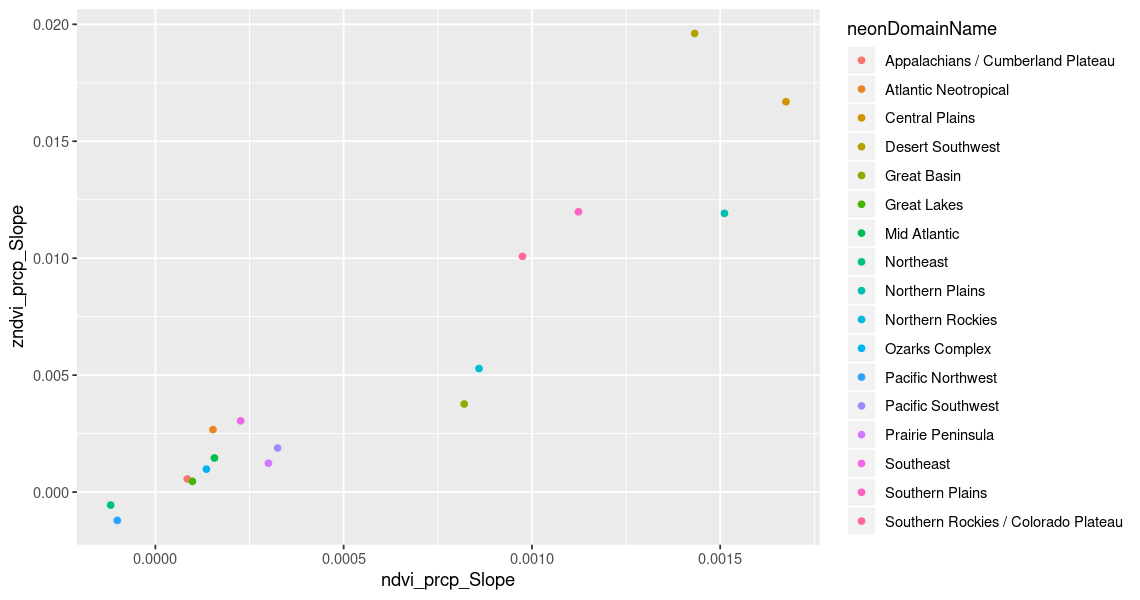

In [9]:
ggplot(aes(x=ndvi_prcp_Slope, y=zndvi_prcp_Slope, col=neonDomainName), data=fe_dom) +
    geom_point()

Warning message:
“Removed 46 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 46 rows containing missing values (geom_point).”

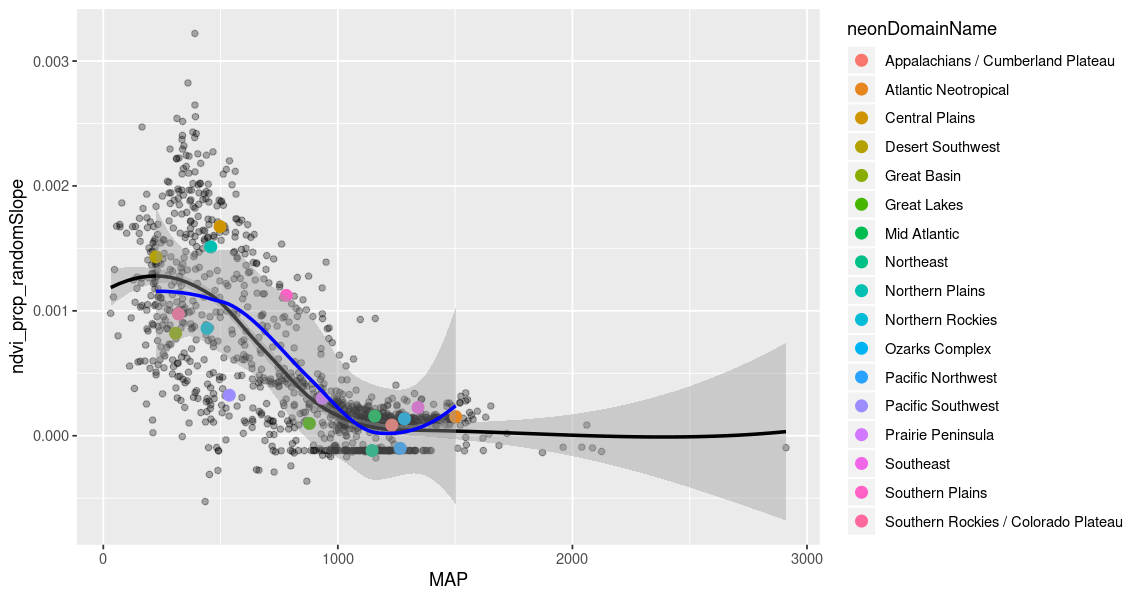

In [10]:
ggplot(re_sta, aes(x=MAP, y=ndvi_prcp_randomSlope)) +
    geom_point(alpha=.3) + geom_smooth(method='loess', col='black') +
    geom_point(aes(x=MAP, y=ndvi_prcp_Slope, col=neonDomainName), size=3, data=fe_dom) + 
    geom_smooth(aes(x=MAP, y=ndvi_prcp_Slope), data=fe_dom, method='loess', col='blue')

Warning message:
“Removed 46 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 46 rows containing missing values (geom_point).”

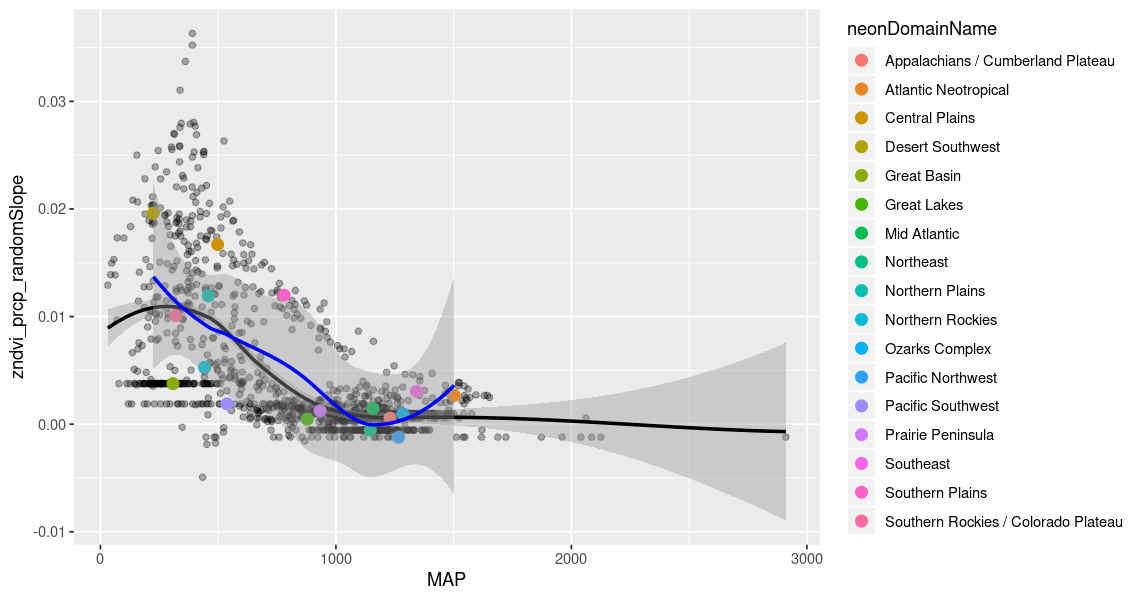

In [11]:
ggplot(re_sta, aes(x=MAP, y=zndvi_prcp_randomSlope)) +
    geom_point(alpha=.3) + geom_smooth(method='loess', col='black') +
    geom_point(aes(x=MAP, y=zndvi_prcp_Slope, col=neonDomainName), size=3, data=fe_dom) + 
    geom_smooth(aes(x=MAP, y=zndvi_prcp_Slope), data=fe_dom, method='loess', col='blue')

In [12]:
# Note that some domains have very small stationid random effects
# in some models, which creates the straight lines above
# Great Basin for example
re_sta %>% filter(neonDomainName=='Great Basin') %>% head()

# Not sure what to do about this

stationid,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,neonDomainName,ndvi_prcp_randomIntcpt,ndvi_prcp_randomSlope,zndvi_prcp_randomIntcpt,zndvi_prcp_randomSlope,zndvi_spei_randomIntcpt,zndvi_spei_randomSlope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00041614,285.2500,9.876198,-1.174537e-05,1.640165e-05,Great Basin,-0.501565808,0.0013309421,2.078984e-05,0.003767940,0.1685192,1.9128626
USH00048702,258.6938,10.048281,-1.045849e-03,2.121937e-04,Great Basin,0.712026353,0.0005444562,7.756092e-05,0.003767959,0.7942004,2.7620896
USH00100448,376.3375,10.647396,-5.280976e-04,8.322298e-05,Great Basin,-0.303147631,0.0008542949,-8.086500e-05,0.003767852,-1.0486518,0.1004746
USH00101408,508.7688,9.253125,1.402064e-05,4.529722e-05,Great Basin,1.094850526,0.0003764801,-2.297915e-04,0.003767702,-1.0006470,0.1773725
USH00101956,601.5875,9.268906,-5.695012e-04,6.811655e-05,Great Basin,1.826927273,0.0001198188,-3.317527e-04,0.003767541,-1.4590295,-0.5076994
USH00103631,188.7875,12.197812,1.023600e-04,-2.445135e-05,Great Basin,-0.007782541,0.0010497948,1.405081e-04,0.003768008,0.9184630,3.0072658


Warning message:
“Removed 46 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 46 rows containing missing values (geom_point).”

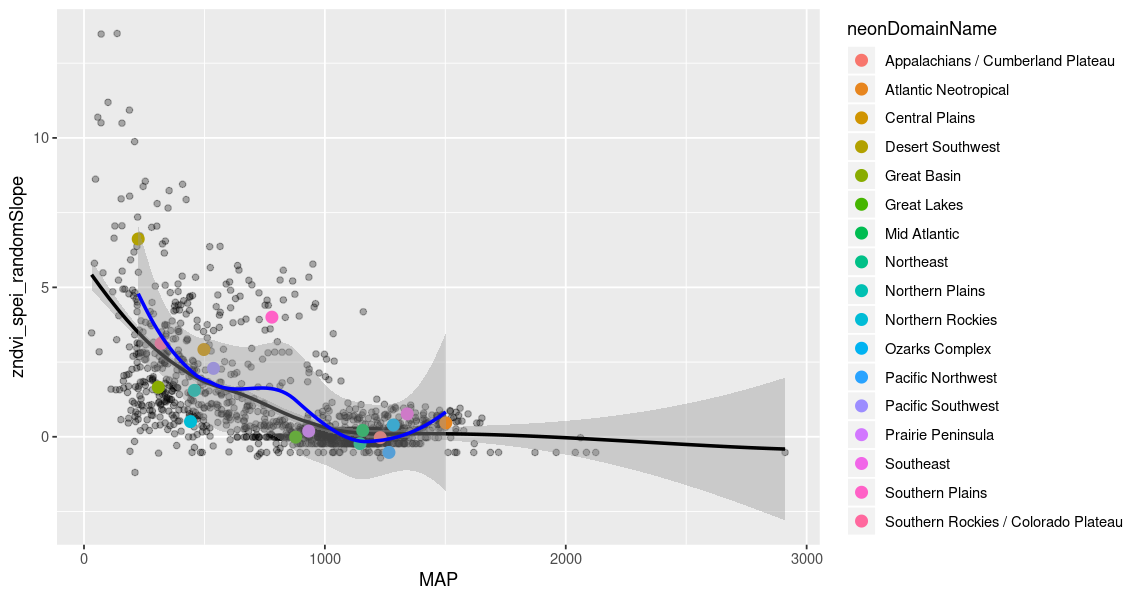

In [13]:
ggplot(re_sta, aes(x=MAP, y=zndvi_spei_randomSlope)) +
    geom_point(alpha=.3) + geom_smooth(method='loess', col='black') +
    geom_point(aes(x=MAP, y=zndvi_spei_Slope, col=neonDomainName), size=3, data=fe_dom) + 
    geom_smooth(aes(x=MAP, y=zndvi_spei_Slope), data=fe_dom, method='loess', col='blue')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


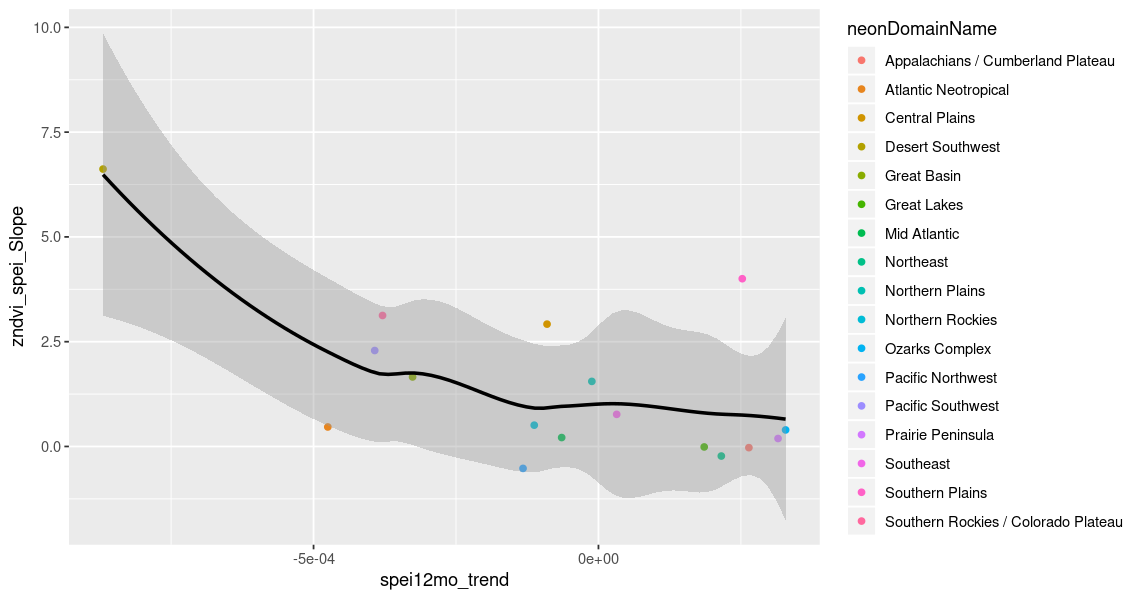

In [14]:
ggplot(aes(x=spei12mo_trend, y=zndvi_spei_Slope, col=neonDomainName), data=fe_dom) +
    geom_point() + geom_smooth(method = "auto", color='black')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


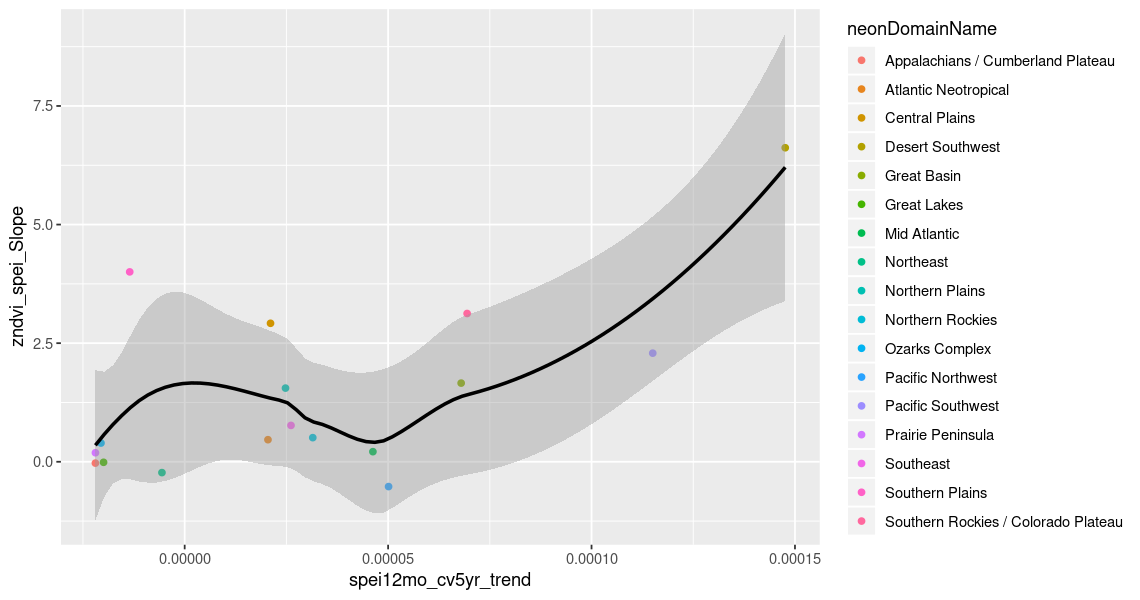

In [15]:
ggplot(aes(x=spei12mo_cv5yr_trend, y=zndvi_spei_Slope, col=neonDomainName), data=fe_dom) +
    geom_point() + geom_smooth(method = "auto", color='black')